### ANALISIS PERBANDINGAN ANTARA FLUTE BANSURI DAN FLUTE SUNDANESE DENGAN MAKSIMUM FREKUENSI 4000 HZ

Kelompok 4:
- Muhammad Habibie Rahman (1306622056)
- Muhammad Irfansyah Adam (1306622055)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import csv
from google.colab import files

# Upload files using Google Colab
print("flute_bansuri.mp3; flute_sundanese.mp3.")
uploaded = files.upload()




flute_bansuri.mp3; flute_sundanese.mp3.


Saving flute_bansuri.mp3 to flute_bansuri.mp3
Saving flute_sundanese.mp3 to flute_sundanese.mp3


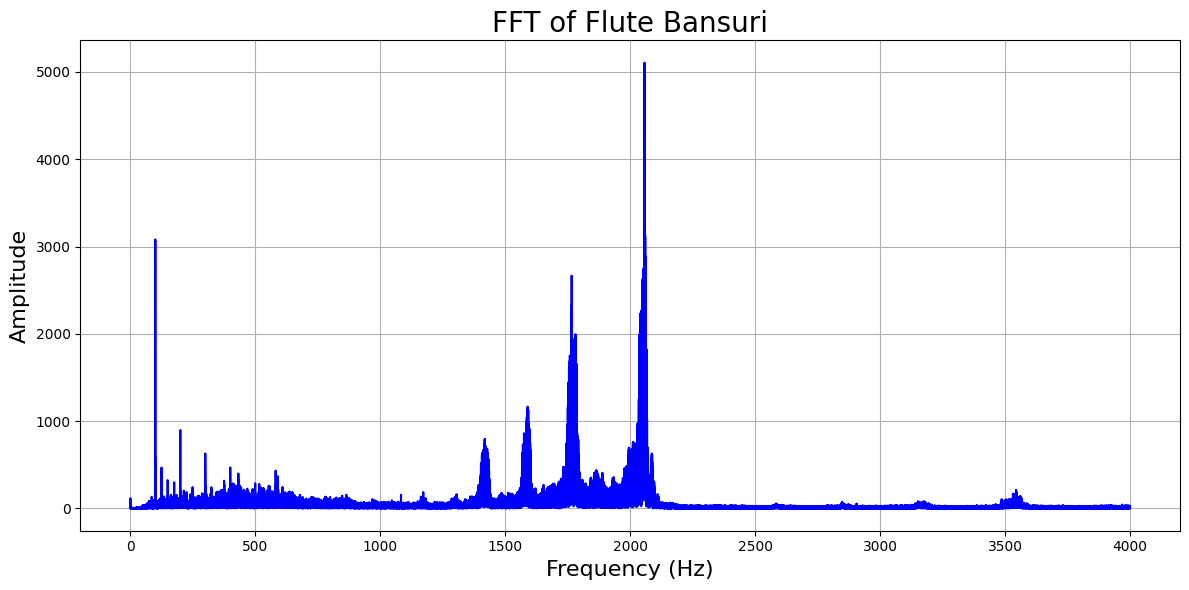

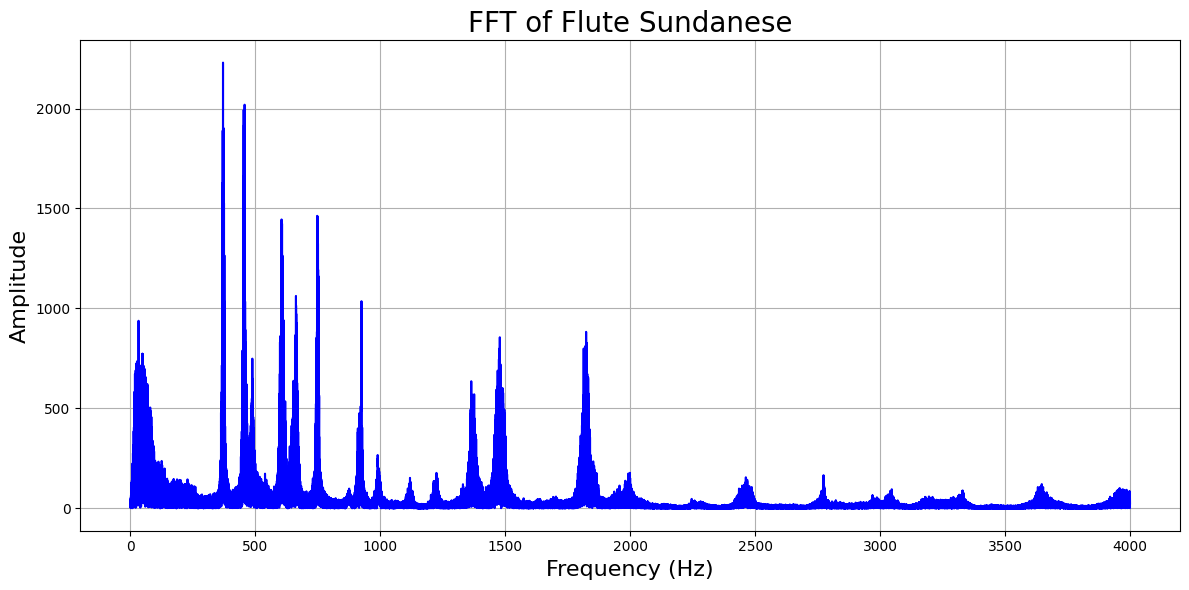

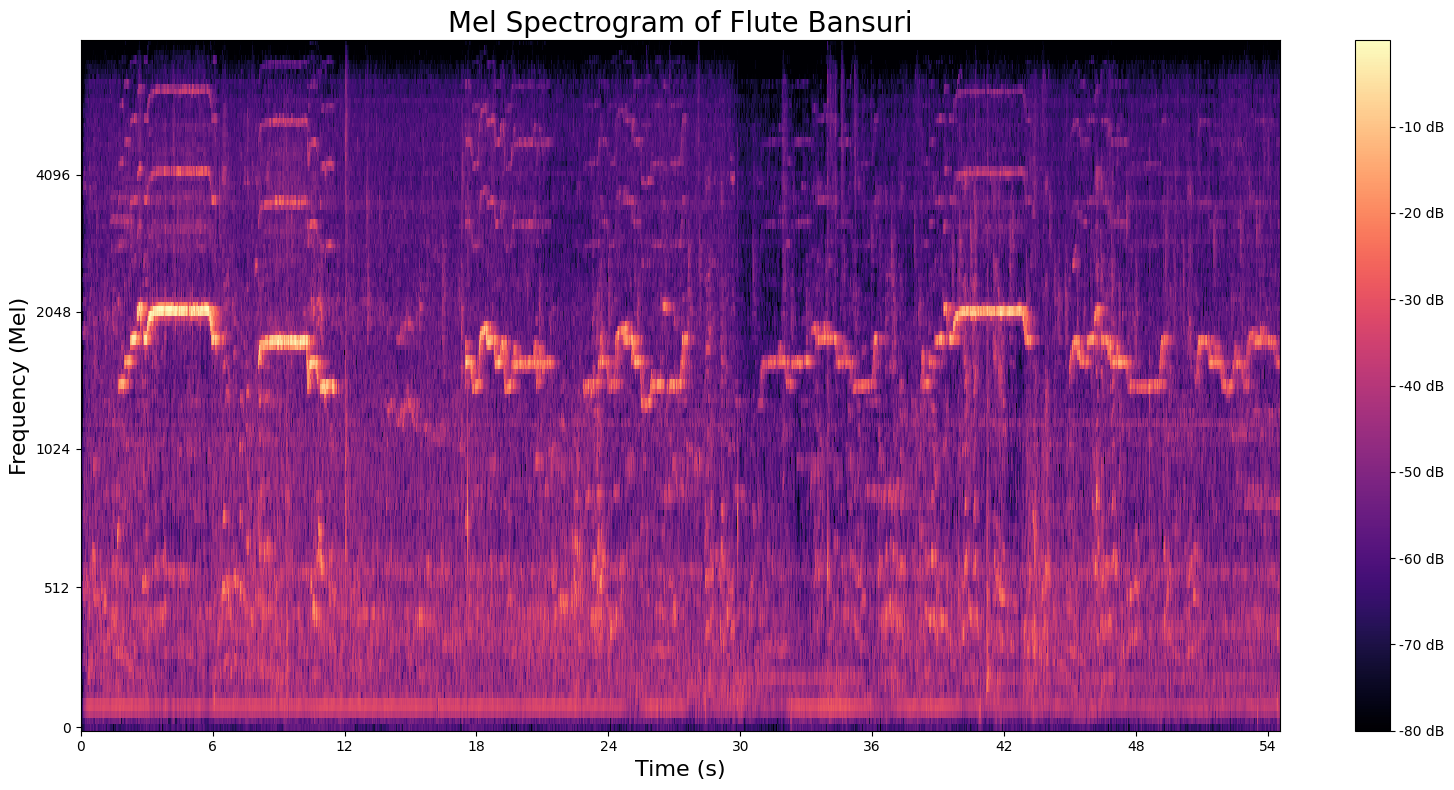

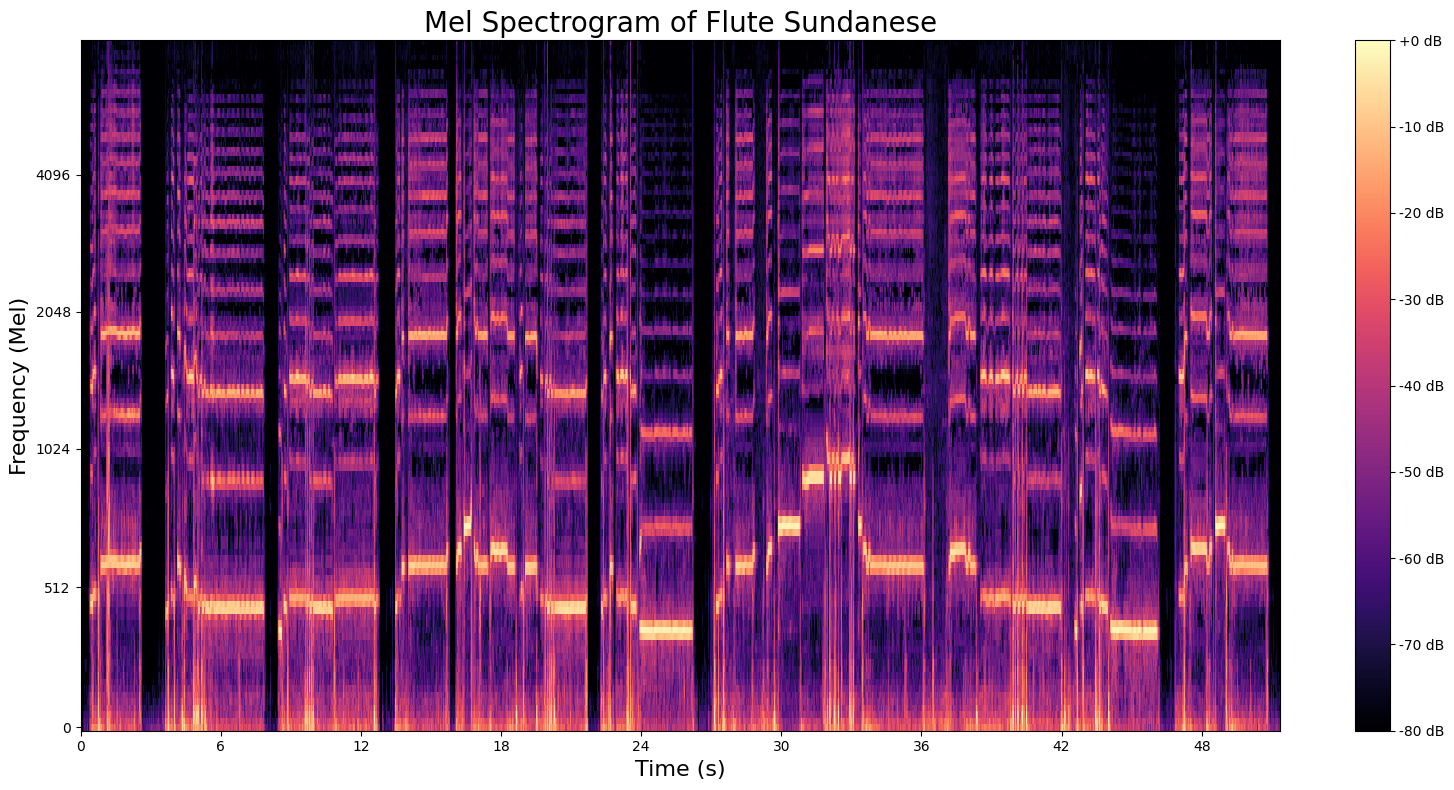

In [3]:
# Ensure the user has uploaded two files
if len(uploaded) != 2:
    raise ValueError("Please upload exactly two audio files.")

# Extract file names
audio_files = list(uploaded.keys())
file1, file2 = audio_files[0], audio_files[1]

# Load audio data and sampling rate
y1, sr1 = librosa.load(file1, sr=None)
y2, sr2 = librosa.load(file2, sr=None)

# Function to calculate and plot FFT
def plot_fft(y, sr, title, output_file=None):
    n = len(y)
    Y = np.fft.fft(y)
    Y = np.abs(Y[:n // 2])  # Take the magnitude of the FFT
    freqs = np.fft.fftfreq(n, 1 / sr)[:n // 2]

    # Limit frequency range
    max_freq = 4000
    indices = freqs <= max_freq
    freqs = freqs[indices]
    Y = Y[indices]

    plt.figure(figsize=(12, 6))
    plt.plot(freqs, Y, color='blue')
    plt.title(f"FFT of {title}", fontsize=20)
    plt.xlabel("Frequency (Hz)", fontsize=16)
    plt.ylabel("Amplitude", fontsize=16)
    plt.grid()
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file)
    plt.show()

# Plot FFT for both recordings
plot_fft(y1, sr1, "Flute Bansuri")
plot_fft(y2, sr2, "Flute Sundanese")

def plot_spectrogram(y, sr, title, output_file=None):
    plt.figure(figsize=(16, 8))
    n_fft = 2048
    hop_length = 512
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000, n_fft=n_fft, hop_length=hop_length)
    S_dB = librosa.power_to_db(S, ref=np.max)

    librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel Spectrogram of {title}", fontsize=20)
    plt.xlabel("Time (s)", fontsize=16)
    plt.ylabel("Frequency (Mel)", fontsize=16)
    plt.tight_layout()

    if output_file:
        plt.savefig(output_file)
    plt.show()

# Plot spectrogram for both recordings
plot_spectrogram(y1, sr1, "Flute Bansuri")
plot_spectrogram(y2, sr2, "Flute Sundanese")

# Function to calculate and save MFCC
def save_mfcc(y, sr, filename):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc = mfcc.T  # Transpose for saving (time steps x coefficients)
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([f"MFCC_{i+1}" for i in range(mfcc.shape[1])])  # Header
        writer.writerows(mfcc)
    print(f"MFCC features saved to {filename}")



In [7]:
# Calculate and save MFCC for the first recording
output_file = "fitur_MFCC_suara_flute_1.csv"
save_mfcc(y1, sr1, output_file)

from google.colab import files
files.download("fitur_MFCC_suara_flute_1.csv")

MFCC features saved to fitur_MFCC_suara_flute_1.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ANALISIS PERBANDINGAN ANTARA FLUTE BANSURI DAN FLUTE SUNDANESE DENGAN MAKSIMUM FREKUENSI 4000 HZ

Berdasarkan analisis spektrum FFT dan  spektrum Mel, Flute Bansuri serta Flute Sundanese memiliki ciri frekuensi yang sangat berbeda. Flute Bansuri membagikan penguasaan pada frekuensi tinggi, dengan puncak  utama yang signifikan di lebih kurang 2000 Hz, mencapai amplitudo lebih berasal 5000 unit. Selain itu, terdapat beberapa zenit sekunder di frekuensi rendah di bawah 500 Hz, namun amplitudonya jauh lebih mungil. kebalikannya, Flute Sundanese mempunyai distribusi amplitudo yang lebih merata, menggunakan dominasi frekuensi rendah hingga menengah (100-1500 Hz) dan  tanpa zenit ekstrem di frekuensi tinggi, sehingga mencerminkan karakter suara yang lebih kaya bass serta midrange.

Analisis spektrum Mel juga mendukung temuan ini. Flute Bansuri memiliki energi yg terfokus di frekuensi menengah sampai tinggi (2048-4096 Mel), terutama di interval ketika eksklusif, menonjolkan dinamika tinggi yg mencirikan bunyi menggunakan pitch atau harmonik tinggi, mirip alat musik gesek atau vokal bernada tinggi. sebaliknya, Flute Sundanese menunjukkan energi yg lebih stabil dan  terdistribusi pada frekuensi rendah hingga menengah (0-2048 Mel), menggunakan konsistensi yg lebih baik sepanjang ketika, mencerminkan karakter suara yg cenderung mendukung elemen latar atau bass-heavy, seperti drum atau bass gitar.

Secara keseluruhan, Flute Bansuri lebih cocok buat bunyi yang membutuhkan artikulasi detail serta kejernihan di frekuensi tinggi, sedangkan Flute Sundanese lebih sesuai buat bunyi yang menonjolkan elemen bass dan  stabilitas pada frekuensi rendah. disparitas ini memberikan kiprah dan  aplikasi yg berbeda untuk masing-masing audio, tergantung di kebutuhan atau konteks penggunaannya.